In [1]:
#Date: 02/25/2020

# Analytics Vidhya
# A Complete Python Tutorial to Learn Data Science from Scratch
# Kunal, Jain: Jan. 14, 2016 

#https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

In [3]:
#Warm Up

fact = 1
for i in range(1, 4):
    fact *= i
    print(fact)

1
2
6


In [4]:
# Read in csv into pandas dataframe
df = pd.read_csv(r"C:\Users\gcarlstedt\Documents\Data Science\Python Data\Loan Prediction Problem\train.csv")

In [5]:
df.head(60) # First 60 rows of dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
#Check for null values

df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
df.describe() # Numerical Summary Variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Property_Area'].value_counts() # Frequency distribution for text (Example)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

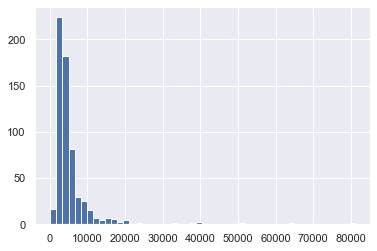

In [9]:
#Distribution Analysis
#Quick histogram to view Applicant Income

df['ApplicantIncome'].hist(bins=50);

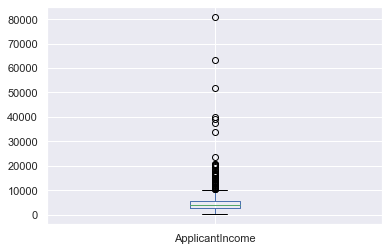

In [10]:
# Another distribtion view via boxplots

df.boxplot(column='ApplicantIncome');

#Confirms a lot of outlier values on the upper end
#Education may be a reason for the disparity 

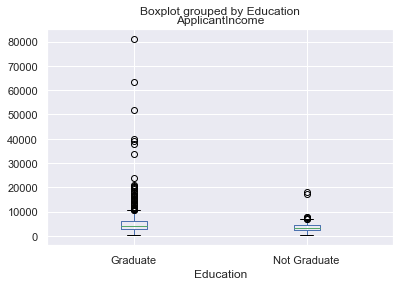

In [11]:
#Boxplot looking at Applicant Income categorized by education 

df.boxplot(column='ApplicantIncome', by='Education');

#Negligible difference between education. however higher degree of outliers for Graduates

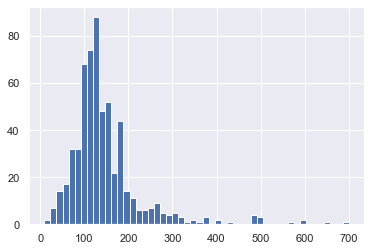

In [12]:
# Distribution look at loan amounts

df['LoanAmount'].hist(bins=50);

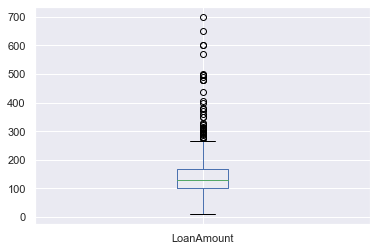

In [13]:
# Boxplot look at loan amounts

df.boxplot(column='LoanAmount');

In [14]:
# Again some extreme values, some data munging may be needed for both Applicant Income and Loan Amount

In [15]:
#Categorical variable analysis
#Look at the chances of getting a load based on credit history

# Pivot tables in Python - Chance of getting a loan based on credit history

temp1 = df['Credit_History'].value_counts(ascending=True)

temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


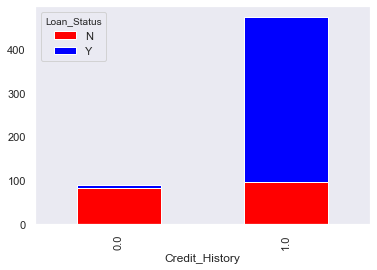

In [16]:
#Some issues with graphing

temp3 = pd.crosstab(df['Credit_History'],df['Loan_Status']) #Similar to like a pivot table 
print(temp3)

temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False);

In [17]:
#Data Munging

# 1. Address missing values
# 2. Address distribution outliers in ApplicantIncome and LoanAmount

In [18]:
#Further exploration into missing data

df.apply(lambda x: sum(x.isnull()),axis=0)

#Note: Missing values not always be NaN values. For example, if Loan_Amount_Term is 0, does that value
#make sense or is it missing 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

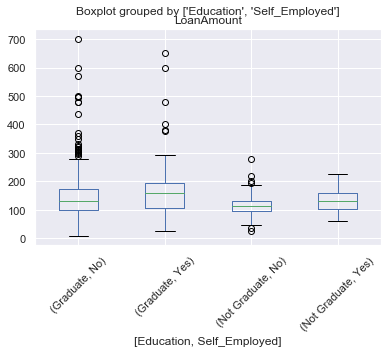

In [19]:
#Key hypothesis is that whether a person is educated or self-employed combined can give a good picture about loan
#amount

df.boxplot(column=['LoanAmount'],by=['Education','Self_Employed'])
plt.xticks(rotation=45);

In [20]:
df['Self_Employed'].value_counts()

#Since a majority values are "No", safe to impute missing values as "No" (~ 86% No)

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df['Self_Employed'].fillna('No',inplace=True)

In [22]:
# Creating a pivot table with median values for all groups of unique values of Self_Employed and Education features
# Defining function, which returns the values of these cells and apply it to fill missing values of loan amount



table = df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)

#Define function to return value of pivot table "Table"
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

#Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1),inplace=True)

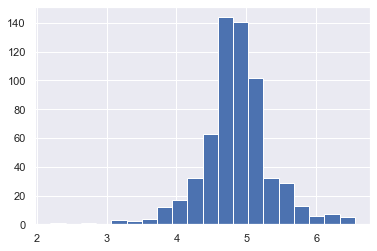

In [23]:
# Treat extreme values in distribution of Loan Amount and Applicant Income

#Since high value loans are possible, try a log transformation

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20);

#Distribution looks much closer to normal

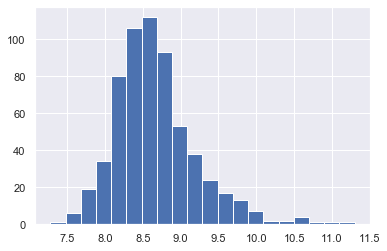

In [24]:
#Applicant Income
#One intuition can be that some applicants have lower income but strong support co-applicants

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20);

In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.764658,342.00000,0.842199,4.857146,7024.705081,8.669414
std,6109.041673,2926.248369,84.145700,65.12041,0.364878,0.496392,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,4.852030,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204


In [26]:
# Look at remaining missing data

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [27]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [28]:
#Keep it simple: Impute missing data with majority (mode) 
#Replacing missing values account for less ~10% --> Personally feel this is within range

#Not a fan on the back to back inplace statements, but it'll suffice
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [29]:
#Some Feature Engineering

#df['Loan_to_Income'] = df['LoanAmount']/df['TotalIncome']
#df['Loan_to_Term'] = df['LoanAmount']/df['Loan_Amount_Term']
#df['Repayment_Ratio'] = df['Loan_to_Term']/df['Loan_to_Income']

#This new variables actually lowered accuracy for cross validation

In [30]:
#df['Repayment_Ratio'].describe()

In [31]:
#Since Sklearn requires all inputs to be numeric, we have to convert all categorical variables into numeric by
#encoding the categories

from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()

for i in var_mod:
    df[i] = le.fit_transform(df[i])

df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [32]:
df.drop('Loan_ID',axis=1, inplace=True)

In [33]:

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold()
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
    
    
#Code is a little above my head right now, glad I was able to get it updated however

In [34]:
#Logistic Regression

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [35]:
#Logistic Regression
#Try a different combination of variables

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [36]:
#Generally we want to see an increase in accuracy with added variables, but it seems Credit_History is heavily weighted
#compared to the other options

#Too addresss this
#1. Feauture Engineering: Deriving new info from current data
#2. Better modeling technique

In [39]:
#Logistic Regression
#Try a different combination of variables --> Attempt at Feature Engineering

#*Switch up use of categorial and numerical variables

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Married','Gender','Education','Self_Employed','Property_Area']
classification_model(model,df,predictor_var,outcome_var)

#Accuracy is the same, try another modeling techique 

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [40]:
#Decision Tree
#Higher accuracy than logistic regression

model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

#Not sure of discrepancies between tutorial and actual

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [42]:
#Random Forest --> Solid choice for solivng classification problem

model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

#However extreme case of overfitting

Accuracy : 100.000%
Cross-Validation Score : 77.037%


In [ ]:
#Overfitting can be solved in two way:

#1. Reducing the number of predictors
#2. Model parameter tuning

In [43]:
# Benefit of Random Forest it can return a feature importance matrix to find and select feature

#Create a series with feature importances

featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp) 

Credit_History      0.269791
TotalIncome_log     0.266693
LoanAmount_log      0.231461
Dependents          0.050393
Property_Area       0.047591
Loan_Amount_Term    0.042951
Married             0.023914
Education           0.022778
Self_Employed       0.022244
Gender              0.022184
dtype: float64


In [44]:
#Use top 5 variables for creating a new Random Forest Model

model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 80.135%


In [ ]:
#Cross-validation score is improving which is good, meaning the model is generalizaing well


#REMEMBBER: Remember that random forest models are not exactly repeatable. Different runs will result in 
#slight variations because of randomization. But the output should stay in the ballpark.

#Take away from excercise


#1. Using a more sophisticated model does not guarantee better results.
#2. Avoid using complex modeling techniques as a black box without understanding the underlying concepts. 
#Doing so would increase the tendency of overfitting thus making your models less interpretable
#3. Feature Engineering is the key to success. Everyone can use an Xgboost models but the real art 
#and creativity lies in enhancing your features to better suit the model.